## Explanatory Data Analysis on Heart Stroke

## Introduction 
A multispecialty hospital is using patient data to enhance patient outcomes and healthcare services. Through the analysis of this data, the hospital hopes to improve patient care, customize treatment plans, and put preventative measures in place to lower the incidence of heart-related problems.
The dataset includes various patient attributes such as age, gender, hypertension, heart disease, average glucose level, BMI, smoking status, and whether the patient had a stroke.


## Data Source
The data set is from the public source of kaggle.com and link yo datasource is:
        https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

## Business Problem
As a data science consultant, I conduct exploratory data analysis to identify insights and trends that can help the hospital enhance its services.


## Business Question to Answer

- Q1:How does the risk of having a stroke change with age, and what can healthcare companies learn from this information?
- Q2:What strategic measures can companies and policymakers adopt based on this data, and how does the incidence of strokes differ by type of work?
- Q3:What can be learned from the gender distribution of stroke cases, and how can companies in the insurance and healthcare industries use this data?
- Q4:Does smoking status and stroke history influence the relationship between BMI and average glucose levels in patients?
- Q5:Are men or women with hypertension more likely to suffer from strokes?
- Q6:Does the type of work and residential location influence stroke risk?
- Q7:How does the interaction of glucose levels and heart disease impact stroke probability?

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Loading Data
- The intial step is to load dataset by using read_csv() method we can load only .csv file. 

In [3]:
df=pd.read_csv("C:/Users/DELL/OneDrive/Desktop/gisma assignments 1-1/ai and app/healthcare-dataset-stroke-data.csv")
df_copy=df
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data Exploration 
- Data exploration involves extracting insights from the dataset. Using the df.shape function, we can see that the dataset contains 5,110 rows and 12 columns.
- Executing df.columns displays the column names, while df.head() prints the first five rows of the dataset by default.
- The describe() function provides an overview of key data characteristics, including potential missing values in the 'bmi' column.
- The distributions of age, average glucose level, and BMI are slightly skewed.
  

In [6]:
df.shape

(5110, 12)

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Cleaning
- There are no duplicate values in dataset

In [10]:
print("duplicate values:",df.duplicated().sum())

duplicate values: 0


## checking for missing values
- df.isnull().sum() returns the number of null values in the dataset for each column separately. 

In [11]:
df=df.drop('id',axis=1)
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## Handling Missing Values
- The BMI column has 201 missing values. Since BMI is an important feature for our analysis, we will handle the missing values by replacing them with the mean, which represents the average body mass index (BMI).

In [12]:
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Identifying outlier
The 'age' variable seems to be in good shape, however the 'avg_glucose_level' data needs outlier management because of its large right skew and multiple outliers.The "bmi" boxplot clearly shows that there are outliers .

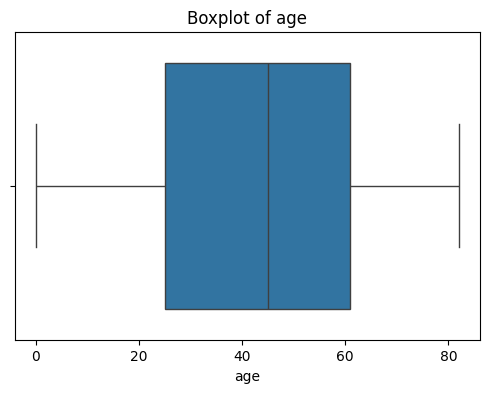

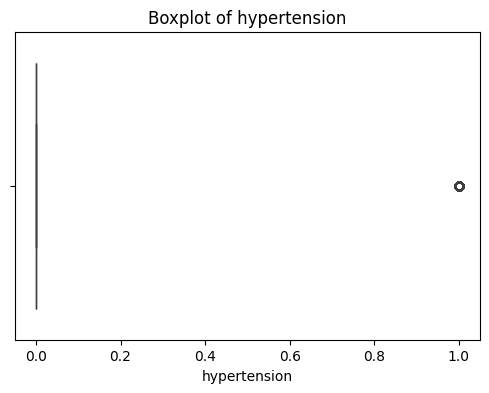

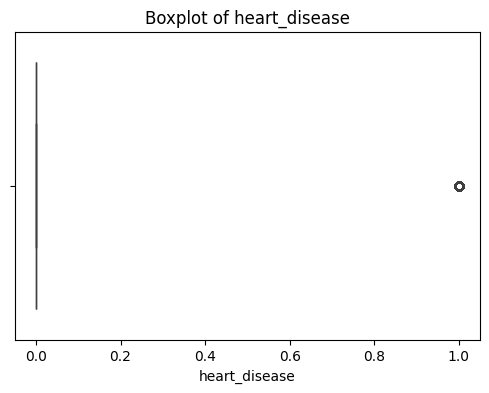

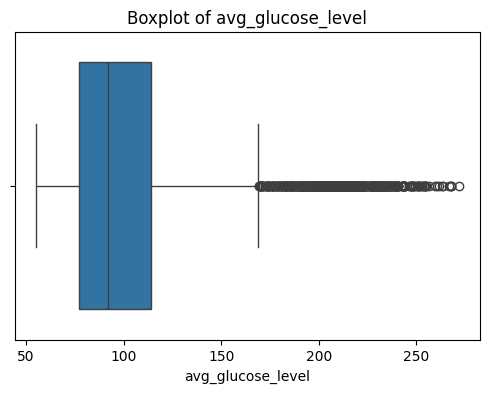

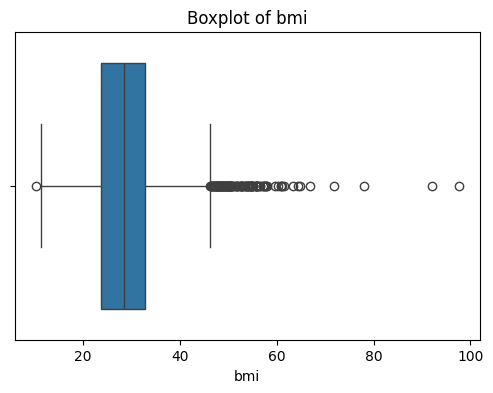

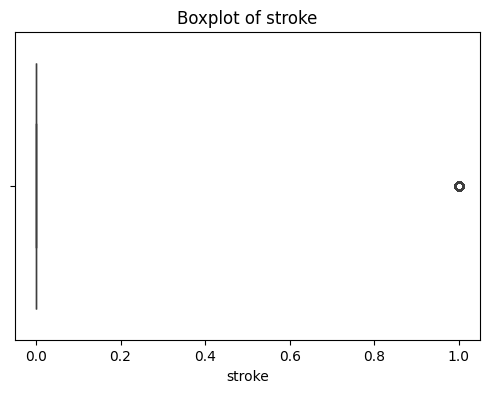

In [13]:
features=df.select_dtypes(include='number')
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

## Handling outliers 
- Ignoring them could result in incorrect models and erroneous analysis. 
- The IQR method with median imputation appears to be a reasonable method for handling the outliers
- Particularly if the data is skewed and its robust method that preserves the data's distribution.

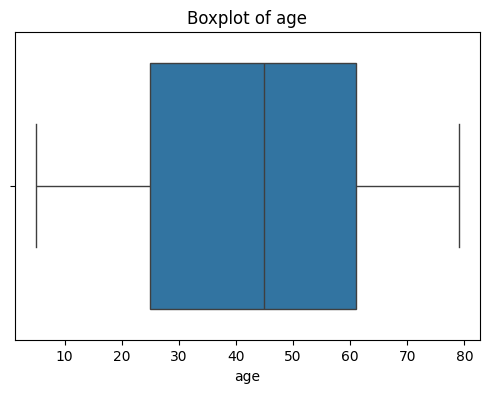

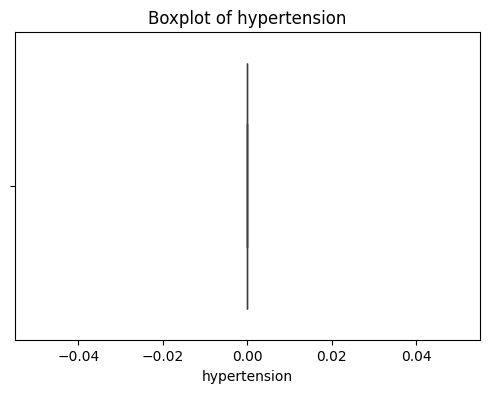

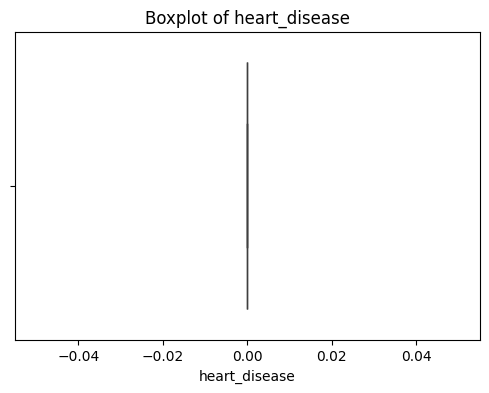

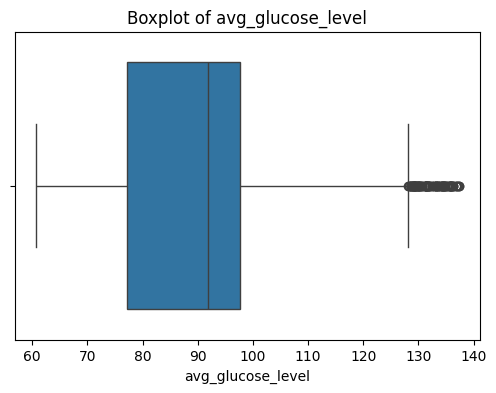

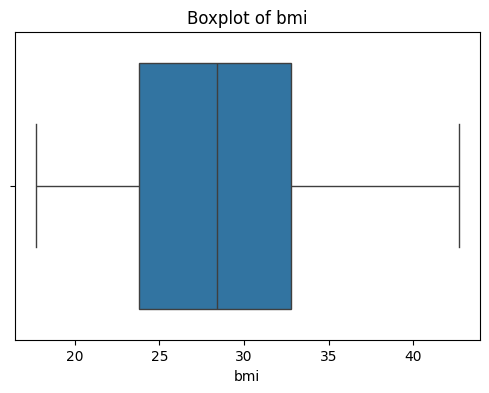

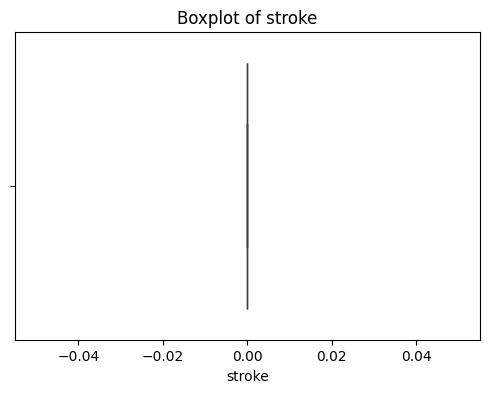

In [16]:
for feature in features:
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound =Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    df[feature]=np.where((df[feature]<lower_bound) | (df[feature]>upper_bound), df[feature].median(), df[feature])

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

## Explanatory Data Analysis 

## Q1: How does the risk of having a stroke change with age, and what can healthcare companies learn from this information?
With a rapid increase in stroke occurrences starting at age 60 and peaking around 80, the density plot indicates that strokes are more prevalent among elderly individuals. To address this, early intervention programs and targeted preventive treatments are essential for middle-aged and older adults. Additionally, insurance companies may adjust premium rates based on age-related risk factors.

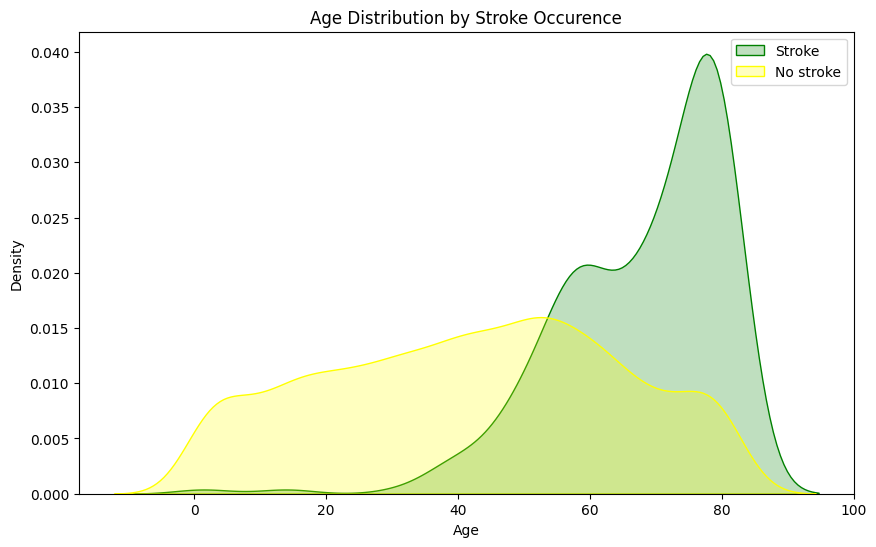

In [18]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['stroke']==1],x='age',label='Stroke',color='green',fill=True)
sns.kdeplot(data=df[df['stroke']==0],x='age',label='No stroke',color='yellow',fill=True)
plt.title('Age Distribution by Stroke Occurence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

## Q2: What strategic measures can companies and policymakers adopt based on this data, and how does the incidence of strokes differ by type of work?
The bar graph shows that employees in the private sector have the highest rate of strokes, followed by independent contractors and government employees. In the private sector, implementing stress management plans, workplace wellness programs, and health screenings can help reduce the risk of strokes among workers. To lower the incidence of strokes in high-stress work environments, policymakers may consider targeted health initiatives, such as mandatory health checkups or workplace ergonomics regulations.

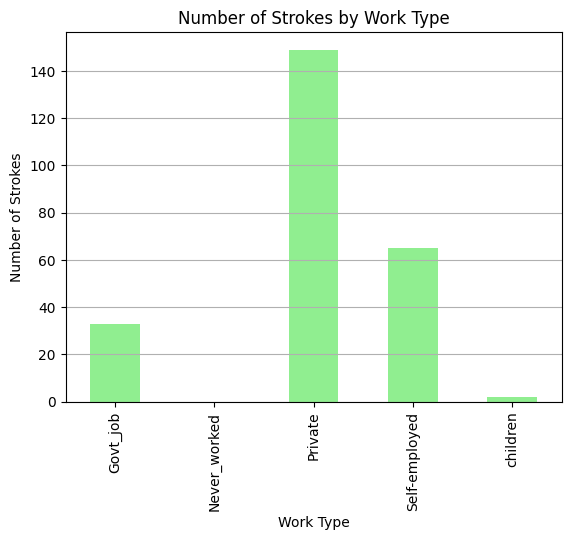

In [20]:
stroke_counts=df.groupby('work_type')['stroke'].sum()

stroke_counts.plot(kind='bar',color='lightgreen')
plt.xlabel('Work Type')
plt.ylabel('Number of Strokes')
plt.grid(axis='y')
plt.title('Number of Strokes by Work Type')
plt.show()

## Q3: What can be learned from the gender distribution of stroke cases, and how can companies in the insurance and healthcare industries use this data? 
According to the pie chart, women experience strokes at a rate of 56.6%, while men experience them at a rate of 43.4%. This suggests that women are somewhat more likely than men to have a stroke, which may be due to biological factors, lifestyle choices, or access to healthcare.
To develop targeted stroke prevention initiatives, it is important to prioritize risk factors such as hormonal effects, increased life expectancy, and postmenopausal health concerns, particularly for women. Based on gender-related stroke risks, insurance companies may adjust their coverage options and premium structures.

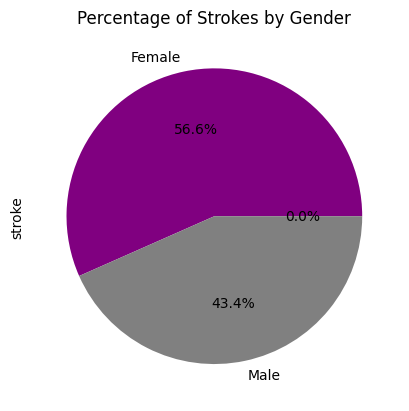

In [22]:
stroke_counts=df.groupby('gender')['stroke'].sum()
colors = ['purple','grey'] 
stroke_counts.plot(kind='pie',autopct="%1.1f%%",colors=colors)
plt.title('Percentage of Strokes by Gender')
plt.show()

## Q4: Does work type and marital status influence stroke occurrence?

- According to the bar graph, those who work for themselves or in the private sector are more likely to have had a stroke, and married people are more likely to be impacted. This suggests that lifestyle variables and stress at work may increase the risk of stroke. Hospitals ought to think about providing these populations with specialized medical care.

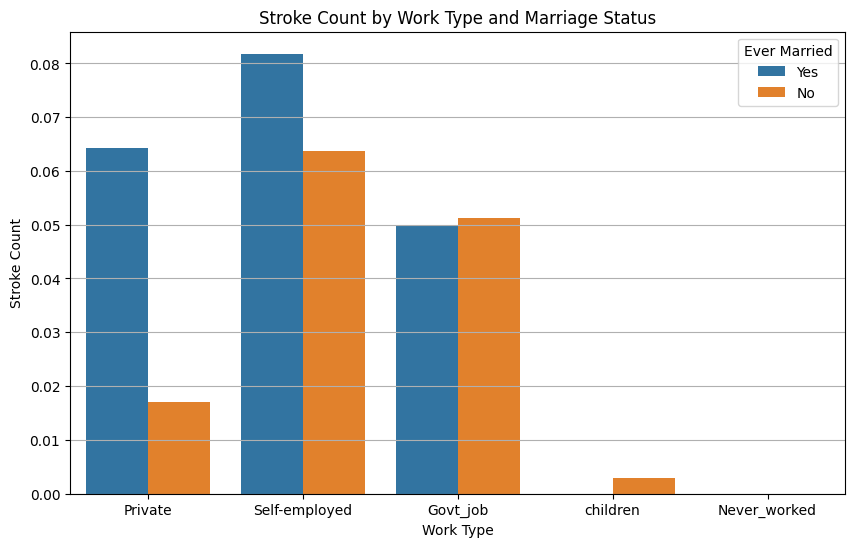

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='work_type', y='stroke',hue='ever_married',errorbar=None)
plt.xlabel('Work Type')
plt.ylabel('Stroke Count')
plt.title('Stroke Count by Work Type and Marriage Status')
plt.legend(title='Ever Married')
plt.grid(axis='y')
plt.show()

## Q5: Are men or women with hypertension more likely to suffer from strokes?
- Although both genders are at significant risk, the data suggests that men with hypertension typically have a slightly higher risk of stroke than women. This highlights the need for gender-specific preventative strategies.

                gender  hypertension    stroke
gender        1.000000      0.020994  0.008929
hypertension  0.020994      1.000000  0.127904
stroke        0.008929      0.127904  1.000000


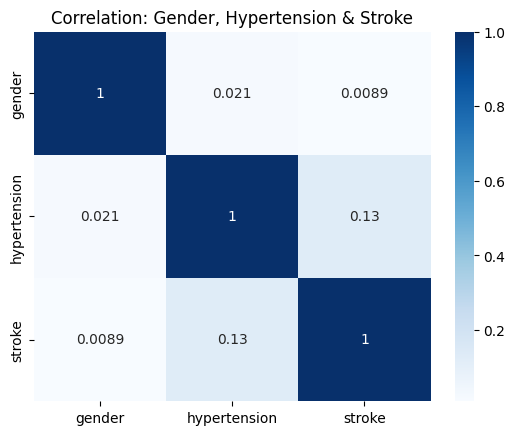

In [5]:
df['gender'] = df['gender'].astype('category').cat.codes
correlation_ghs = df[['gender', 'hypertension', 'stroke']].corr()
print(correlation_ghs)
sns.heatmap(correlation_ghs, annot=True, cmap="Blues")
plt.title("Correlation: Gender, Hypertension & Stroke")
plt.show()

## Q6: Does the type of work and residential location influence stroke risk?
- Individuals who are self-employed or work in the private sector, particularly in urban areas, are more likely to experience strokes. This may be due to stress-related factors, lifestyle choices in cities, and work-related demands.

                work_type  Residence_type    stroke
work_type        1.000000       -0.007316 -0.032316
Residence_type  -0.007316        1.000000  0.015458
stroke          -0.032316        0.015458  1.000000


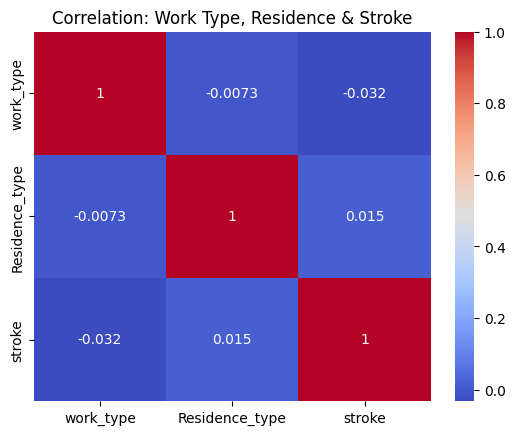

In [19]:
df['work_type'] = df['work_type'].astype('category').cat.codes
df['Residence_type'] = df['Residence_type'].astype('category').cat.codes
correlation_wrs = df[['work_type', 'Residence_type', 'stroke']].corr()
print(correlation_wrs )
sns.heatmap(correlation_wrs, annot=True, cmap="coolwarm")
plt.title("Correlation: Work Type, Residence & Stroke")
plt.show()


## Q7: How does the interaction of glucose levels and heart disease impact stroke probability?
Stroke risk is more strongly correlated in patients with both heart disease and high blood sugar than in those with only one of these conditions. This suggests that managing diabetes is crucial, especially for individuals who already have heart problems.

                   avg_glucose_level  heart_disease    stroke
avg_glucose_level           1.000000       0.161857  0.131945
heart_disease               0.161857       1.000000  0.134914
stroke                      0.131945       0.134914  1.000000


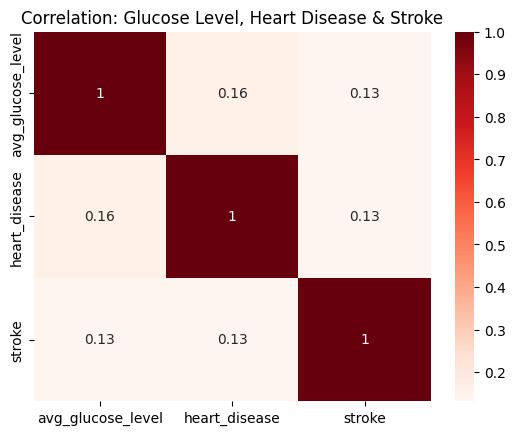

In [4]:
correlation_glhds = df[['avg_glucose_level', 'heart_disease', 'stroke']].corr()
print(correlation_glhds)
sns.heatmap(correlation_glhds, annot=True, cmap="Reds")
plt.title("Correlation: Glucose Level, Heart Disease & Stroke")
plt.show()


## Conclusion
The explanatory data analysis highlights the factors influencing stroke risk, emphasizing the importance of age, gender, BMI, glucose levels, and smoking status. Despite its limitations, the analysis provides the hospital with a solid foundation for developing preventative care initiatives and targeted treatments. By leveraging these findings, the hospital can enhance overall healthcare services, reduce stroke incidence, and improve patient outcomes.